# Ejercicios de Visualización con Matplotlib y Seaborn

La visualización de datos es una de las herramientas más importantes en el análisis de datos y la ciencia de datos. No solo nos permite explorar y entender mejor los datos, sino que también nos ayuda a comunicar hallazgos de manera efectiva. A través de gráficos, podemos detectar patrones, relaciones y anomalías que serían difíciles de identificar solo con números o tablas.

In [3]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Ejercicio 1 - Gráfico de líneas simple

Supongamos que, en tu oficina, te toma 10 segundos recorrer 25 metros caminando tranquilamente hacia la máquina de café. Si queremos expresar esta situación como una función lineal de la distancia respecto al tiempo, usamos la fórmula:

$
\text{distancia} = \text{velocidad} \times \text{tiempo}
$



Dado que la velocidad es constante, esta representa la pendiente de la función y se puede interpretar como la primera derivada de la distancia con respecto al tiempo. Es decir, nos indica qué tan rápido cambia la distancia mientras pasa el tiempo.

- **Calcula la velocidad constante a la que caminas:** Sabemos que recorriste 25 metros en 10 segundos. ¿Cuál es la velocidad (en metros/segundo)?
- **Construye la función lineal que describe cómo cambia la distancia con el tiempo:** Usa la fórmula `distancia = velocidad × tiempo` para calcular la distancia recorrida en cada segundo desde 0 a 10.
- **Usa Matplotlib para graficar cómo cambia la distancia con el tiempo:** Agrega etiquetas a los ejes y un título al gráfico.

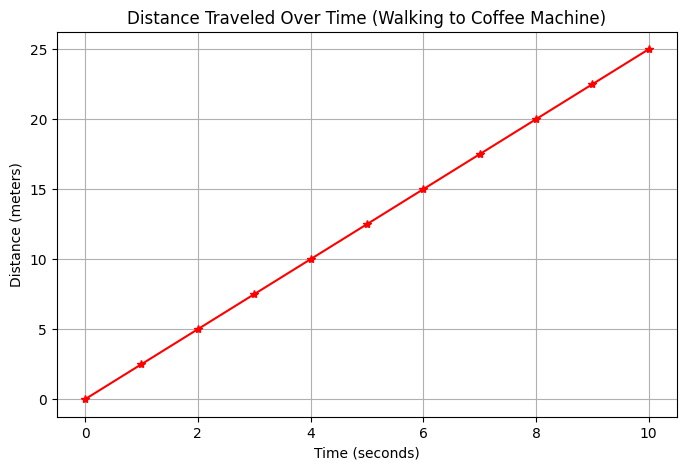

In [3]:
x = np.arange(0, 11) # array con valores de 0 a 10
time = np.arange(0, 11) # array with values from 0 to 10

#speed= distance/time = 25m/10sec = 2.5m/sec

# Distance values (speed = 2.5 m/s)
distance = [2.5 * t for t in time]

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(time, distance, marker='*', linestyle='-', color='red')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled Over Time (Walking to Coffee Machine)')

# Show the plot
plt.grid(True)
plt.show()

### ¿Qué crees que pasaría con la gráfica si caminaras más rápido o más lento? ¿Cómo cambiaría la pendiente? Prueba modificar la velocidad a 3 m/s y vuelve a graficar.

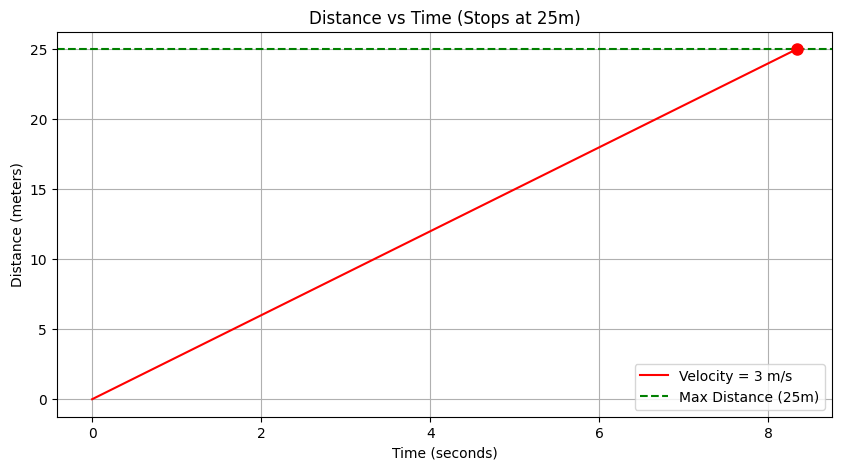

In [4]:
#if we walked faster the line would be steeper as we will need less seconds to reach the 25meters. 
#Similarly the line would be softer if we walked slower as we will need more seconds to reach the 25 meters. 

x = np.arange(0, 11) # array with values from 0 to 10
velocity = 3
y = velocity * x

# Time values (0 to 10 seconds) using np.arange
#time = distance/speed = 25/3 ~8.33 sec

velocity = 3  # m/s
max_distance = 25  # meters

# Calculate the exact stopping time
stop_time = max_distance / velocity  # ≈8.33 seconds

# Create time array up to stop_time (with finer resolution for smoothness)
x = np.linspace(0, stop_time, 10)  # 10 points between 0 and 8.33
y = velocity * x  # Distance never exceeds 25m

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r-', label=f'Velocity = {velocity} m/s')
plt.axhline(y=max_distance, color='green', linestyle='--', label='Max Distance (25m)')

# Annotate the stopping point
plt.plot(stop_time, max_distance, 'ro', markersize=8)  # Red dot at (8.33, 25)

# Labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title(f'Distance vs Time (Stops at {max_distance}m)')
plt.grid(True)
plt.legend()
plt.show()

## Ejercicio 2 - Representar visualmente datos categóricos.

Imagina que estás analizando cuántos estudiantes están matriculados en distintas carreras dentro de una universidad. Estos datos, que representan **categorías** (las carreras), son ideales para visualizar usando un **gráfico de barras**.

A continuación, se presenta un pequeño conjunto de datos con la cantidad de estudiantes por carrera.

In [10]:
df_carreras = pd.DataFrame({
    'Carrera': ['Ingeniería', 'Medicina', 'Derecho', 'Psicología'],
    'Estudiantes': [120, 80, 60, 100]
})

df_carreras


,Carrera,Estudiantes
0,Ingeniería,120
1,Medicina,80
2,Derecho,60
3,Psicología,100


1. Representa gráficamente cuántos estudiantes hay en cada carrera y utiliza un gráfico de barras vertical con Matplotlib. 
2. Etiqueta los ejes correctamente y agrega un título descriptivo.
3. Usa un color que ayude a destacar las diferencias entre categorías.



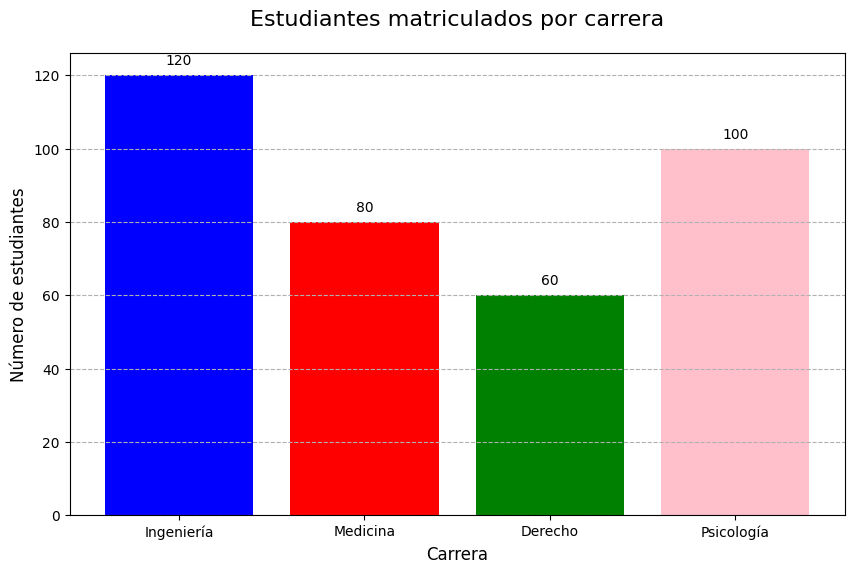

In [12]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
bars = plt.bar(df_carreras['Carrera'], df_carreras['Estudiantes'], color=['b', 'r', 'g', 'pink'])

# Personalización:
plt.title('Estudiantes matriculados por carrera', fontsize=16, pad=20)  # Título
plt.xlabel('Carrera', fontsize=12)  
plt.ylabel('Número de estudiantes', fontsize=12)  
plt.grid(axis='y', linestyle='--')  # Líneas de grid horizontales

# Añadir etiquetas de valor sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

### ¿Qué pasaría si usás un gráfico de barras **horizontal**? ¿Te resulta más legible? Intenta hacerlo

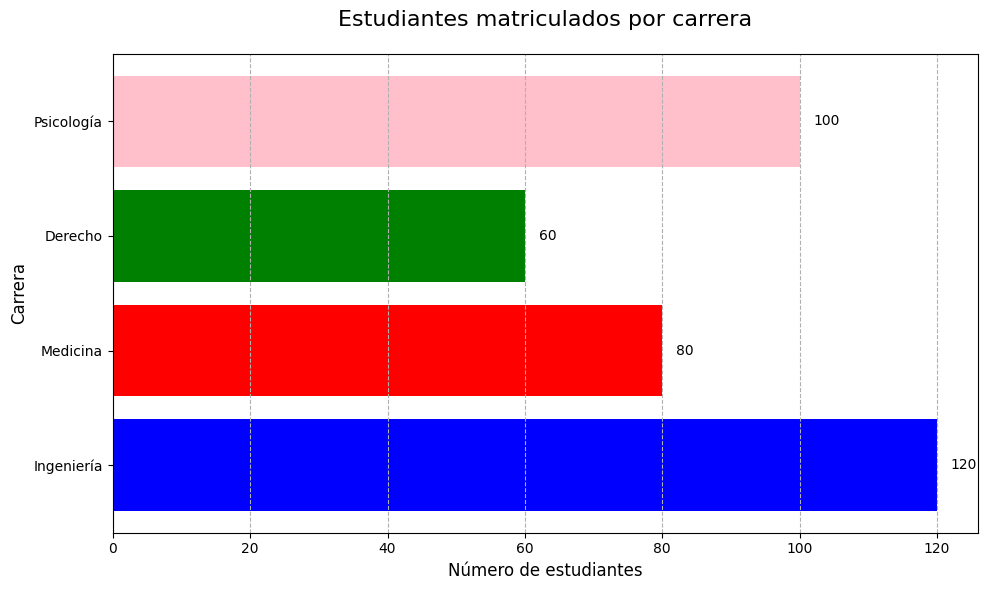

In [13]:
plt.figure(figsize=(10, 6))  # Mismo tamaño para comparación justa

# Barras HORIZONTALES (barh en lugar de bar)
bars = plt.barh(df_carreras['Carrera'], df_carreras['Estudiantes'], 
                color=['b', 'r', 'g', 'pink'])

# Personalización adaptada:
plt.title('Estudiantes matriculados por carrera', fontsize=16, pad=20)
plt.ylabel('Carrera', fontsize=12)  # Ahora en el eje Y
plt.xlabel('Número de estudiantes', fontsize=12)  # Ahora en el eje X
plt.grid(axis='x', linestyle='--')  # Grid vertical (para el eje X ahora)

# Añadir etiquetas (ajustadas para horizontal)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2,  # Desplazamiento a la derecha de la barra
             bar.get_y() + bar.get_height()/2,  # Centrado vertical
             f'{int(width)}', 
             ha='left', va='center', fontsize=10)  # Alineación izquierda-centro

plt.tight_layout()  # Mejor ajuste de márgenes
plt.show()

## Ejercicio 3: Visualizar proporciones con un gráfico circular.

Supongamos que deseas entender cómo se distribuyen los estudiantes entre distintas carreras en una universidad. Aunque ya representaste estos datos con un gráfico de barras, ahora quieres ver **qué porcentaje del total representa cada carrera**.

Una forma muy común de representar proporciones es usando un **gráfico de pastel (pie chart)**, ya que permite tener una visión rápida e intuitiva de cómo se divide el todo.


- Representa los datos de `df_carreras` como un gráfico de pastel.
- Muestra el **porcentaje** que representa cada carrera sobre el total.
- Agrega un **título descriptivo** que explique qué se está visualizando.

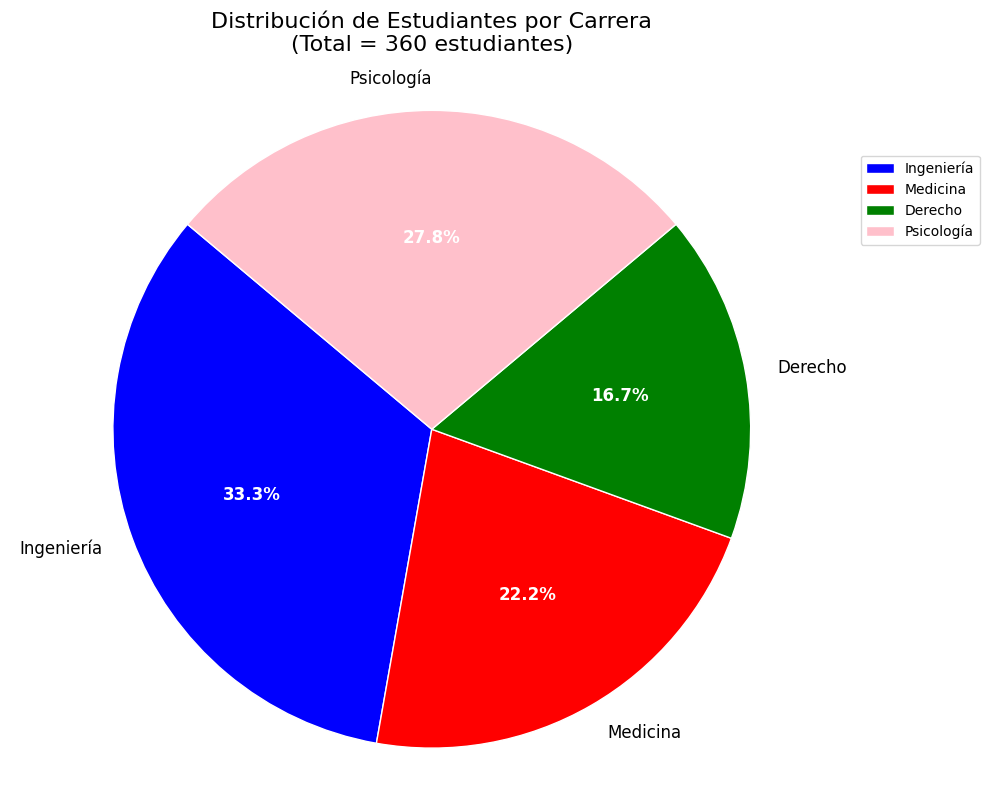

In [16]:
df_carreras


df_carreras = pd.DataFrame({
    'Carrera': ['Ingeniería', 'Medicina', 'Derecho', 'Psicología'],
    'Estudiantes': [120, 80, 60, 100]
})

# Calculate percentages
total = df_carreras['Estudiantes'].sum()
df_carreras['Porcentaje'] = (df_carreras['Estudiantes'] / total) * 100

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'pink']  

# Plot with percentage labels and custom formatting
patches, texts, autotexts = plt.pie(
    df_carreras['Estudiantes'],
    labels=df_carreras['Carrera'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# Improve label visibility
plt.setp(autotexts, color='white', weight='bold')
plt.setp(texts, fontsize=12)

# Add title and legend
plt.title('Distribución de Estudiantes por Carrera\n(Total = {} estudiantes)'.format(total),
          fontsize=16, pad=20)
plt.legend(patches, df_carreras['Carrera'],
           loc='upper left',
           bbox_to_anchor=(1, 0.9))

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')
plt.tight_layout()
plt.show()

## Ejercicio 4 - Explorar la relación entre dos variables numéricas creando un gráfico de dispersión con Seaborn

Imagina que estás analizando las características de distintas especies de flores. Cada flor tiene varias medidas:

- Largo del sépalo
- Ancho del sépalo
- Largo del pétalo
- Ancho del pétalo
- Especie a la que pertenece

Una excelente forma de **visualizar la relación entre dos variables numéricas** es mediante un **gráfico de dispersión** (`scatter plot`).

En este caso, vamos a explorar si existe una relación entre el `largo` y el `ancho` del sépalo, y si esta varía según la especie de la flor.


In [4]:
df_iris = pd.DataFrame({ # DataFrame con datos aleatorios
    'sepal_length': np.random.normal(5.8, 0.4, 150),
    'sepal_width': np.random.normal(3.0, 0.3, 150),
    'petal_length': np.random.normal(3.7, 1.5, 150),
    'petal_width': np.random.normal(1.2, 0.8, 150),
    'species': np.random.choice(['setosa', 'versicolor', 'virginica'], 150)
})

df_iris # Mostrar DataFrame


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.442835,2.463090,4.623704,1.416361,versicolor
1,5.598446,3.345602,3.770703,3.015470,virginica
2,5.964978,2.996232,2.263646,1.643076,versicolor
3,6.241011,2.793157,5.337379,2.194377,versicolor
4,6.342339,2.963498,5.837014,2.219775,setosa
...,...,...,...,...,...
145,6.414240,3.721616,4.626131,0.718917,virginica
146,6.201998,3.503014,4.381192,0.588566,setosa
147,4.982149,3.433054,2.265519,0.393966,versicolor
148,6.048576,3.220361,3.640196,2.513788,setosa


1. Crea un gráfico de dispersión con `sepal_length` en el eje X y `sepal_width` en el eje Y.
2. Usa el argumento `hue` para diferenciar las especies de flores.
3. Agrega un título descriptivo.
4. Ajusta el tamaño de los puntos o la paleta de colores para que el gráfico sea más claro. **(Opcional)**

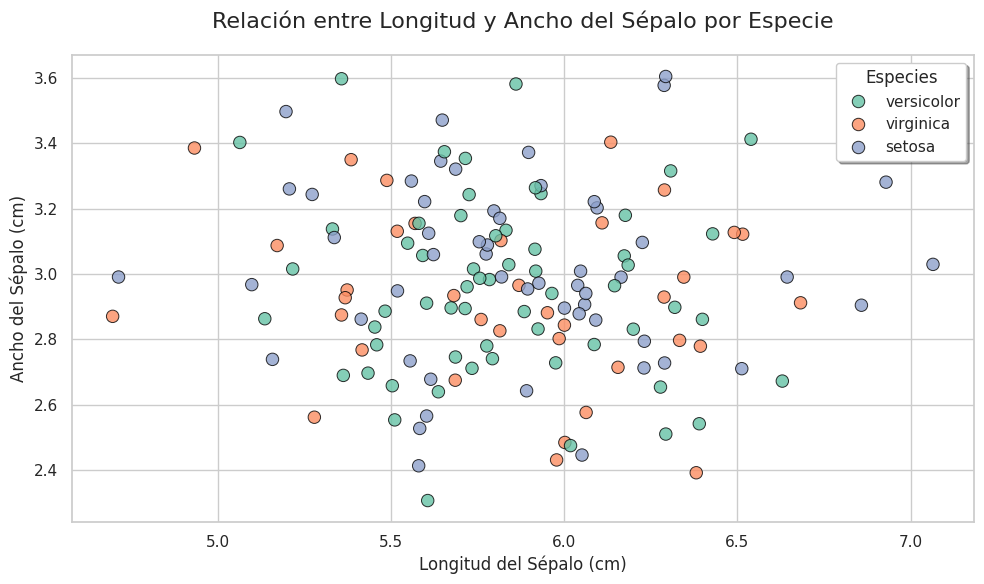

In [ ]:

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_iris,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    palette='Set2',  
    s=80,              # Tamaño de los puntos aumentado para mejor visibilidad
    alpha=0.8,         # Ligera transparencia para puntos superpuestos
    edgecolor='black'  # Borde negro para mejor definición
)

# Personalización adicional
plt.title('Relación entre Longitud y Ancho del Sépalo por Especie', fontsize=16, pad=20)
plt.xlabel('Longitud del Sépalo (cm)', fontsize=12)
plt.ylabel('Ancho del Sépalo (cm)', fontsize=12)

# Mejorar la leyenda
plt.legend(
    title='Especies',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    frameon=True,
    shadow=True
)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Ejercicio 5 - Visualización de distribuciones con histogramas

En muchos casos, no solo nos interesa el valor de una variable, sino **cómo se distribuyen** esos valores.

Los histogramas son una herramienta visual muy útil para:

- Ver si los datos están **centrados** o dispersos.
- Detectar **asimetrías** (por ejemplo, si hay más valores bajos o altos).
- Identificar posibles **valores atípicos** (*outliers*).
- Observar la **forma general** de la distribución (normal, sesgada, bimodal, etc.).

Vamos a explorar cómo se distribuye el **largo del pétalo** (`petal_length`) en un conjunto de datos de flores.

In [5]:
df_iris.head() # Mostrar DataFrame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.442835,2.463090,4.623704,1.416361,versicolor
1,5.598446,3.345602,3.770703,3.015470,virginica
2,5.964978,2.996232,2.263646,1.643076,versicolor
3,6.241011,2.793157,5.337379,2.194377,versicolor
4,6.342339,2.963498,5.837014,2.219775,setosa


1. Crea un **histograma con `Seaborn`** para visualizar la distribución del largo del pétalo (`petal_length`).
2. Ajusta el número de *bins* para tener mayor o menor nivel de detalle.
3. Agrega título, etiquetas y un estilo visual claro.

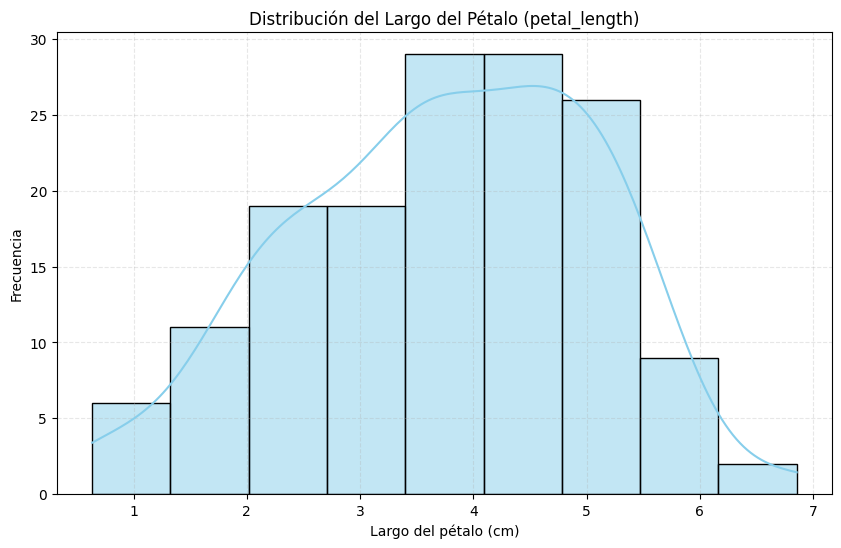

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_iris, x='petal_length', bins='sturges' , kde=True, color='skyblue')
plt.title('Distribución del Largo del Pétalo (petal_length)')
plt.xlabel('Largo del pétalo (cm)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#escribiendo "sturges" en el numero de bins, veremos los bins adecuados que forman la linea que tenemos. Escribiendo otro numero de bins mas grande, veremos variacion, pero la linea sigue igual. 

## Comparación por especie (distribuciones múltiples)

Ahora, compara la distribución del largo del pétalo para cada especie de flor usando `Seaborn` y el argumento `hue`.

Esto te permitirá analizar si hay **diferencias significativas** entre los grupos.

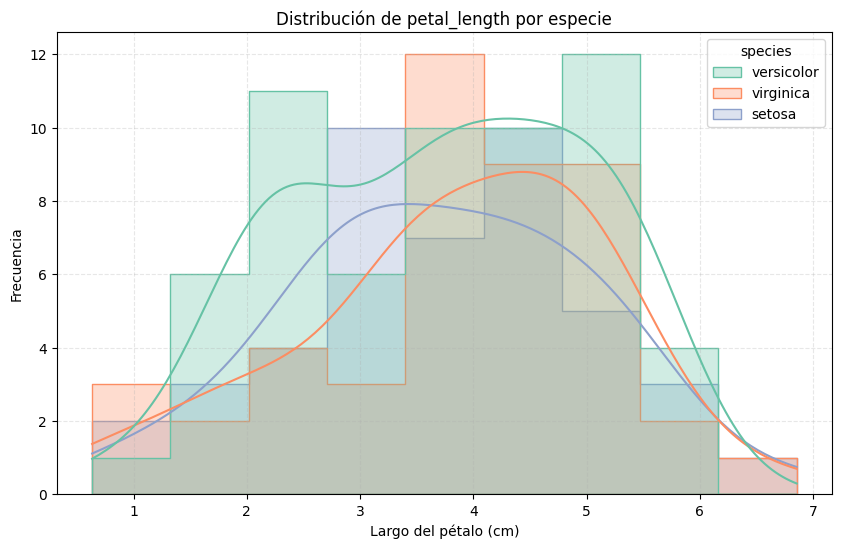

/tmp/ipykernel_624/3635489566.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


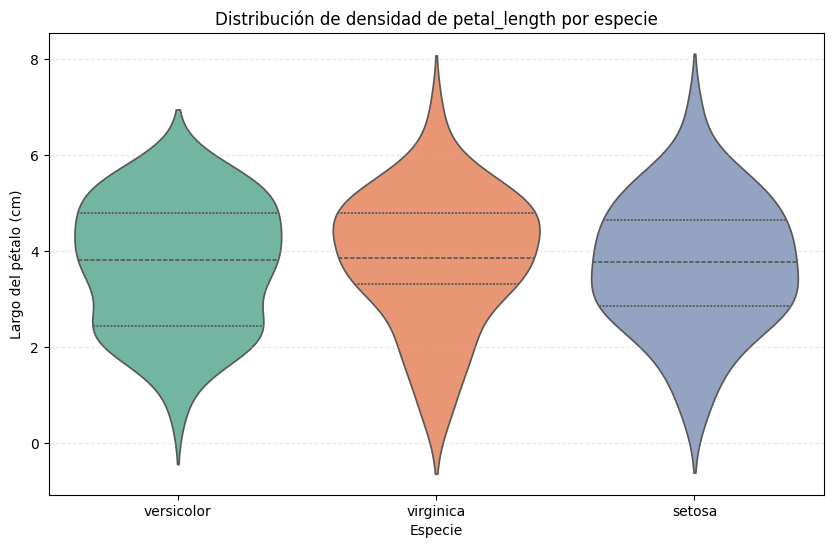

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_iris,
    x='petal_length',
    hue='species',
    element='step',  
    bins='sturges',     
    kde=True,        # Línea de densidad suavizada
    palette='Set2',  
    alpha=0.3        # Transparencia para superposiciones
)
plt.title('Distribución de petal_length por especie')
plt.xlabel('Largo del pétalo (cm)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_iris,
    x='species',
    y='petal_length',
    palette='Set2',
    inner='quartile'  # Muestra quartiles dentro del violín
)
plt.title('Distribución de densidad de petal_length por especie')
plt.ylabel('Largo del pétalo (cm)')
plt.xlabel('Especie')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

## Ejercicio 6 - Visualización de relaciones con mapas de calor (heatmap)

En ciencia de datos es importante comprender cómo se relacionan las variables entre sí. Una forma visual de hacerlo es usando mapas de calor, especialmente sobre matrices de correlación.

En este ejercicio vamos a visualizar cómo se relacionan las variables numéricas del conjunto `df_iris`.



1. Crea un mapa de calor que muestre la correlación entre las variables numéricas del DataFrame `df_iris`.Primero necesitas calcular la matriz de correlación usando `.corr()`.
2. Usa la librería **seaborn** para graficar el heatmap.
3. Activa la visualización de los valores dentro del gráfico `(annot=True)`.

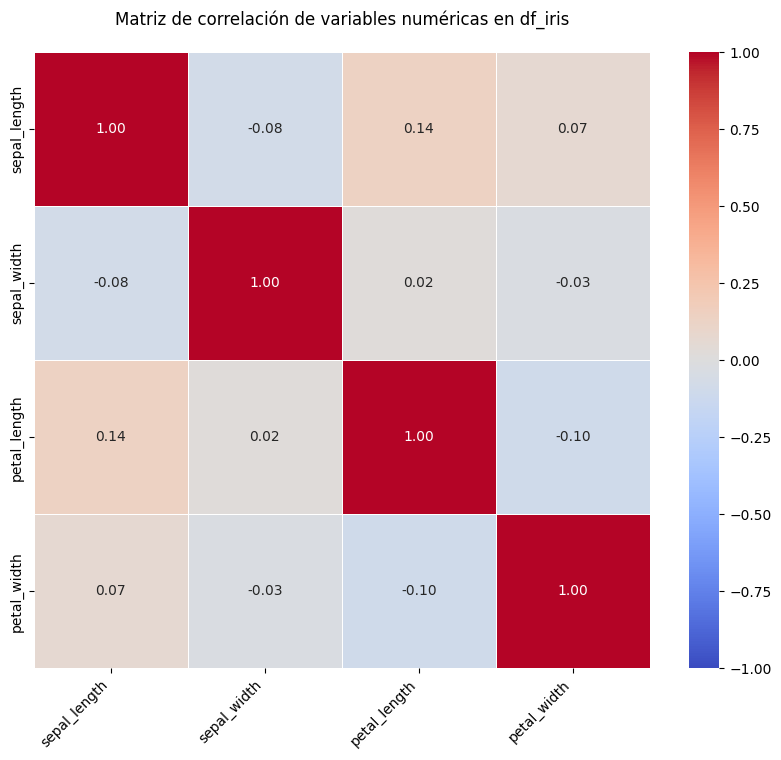

In [24]:
df_iris

# 1. Calcular la matriz de correlación
correlation_matrix = df_iris.select_dtypes(include=['float64']).corr()

# 2. Crear el heatmap con seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,          # Mostrar valores dentro de las celdas
    fmt=".2f",          # Formato de 2 decimales
    cmap='coolwarm',    # Mapa de colores 
    vmin=-1,            # Valor mínimo para la escala de colores
    vmax=1,             # Valor máximo para la escala de colores
    linewidths=0.5,     # Grosor de las líneas entre celdas
    square=True         # Forma cuadrada para cada celda
)

# 3. Personalizar el gráfico
plt.title('Matriz de correlación de variables numéricas en df_iris', pad=20)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

## Ejercicio 7 - Visualización de la distribución por categorías con boxplot

El boxplot (o diagrama de caja) permite comparar cómo se distribuye una variable numérica según distintas categorías.

Vamos a comparar la distribución del largo del pétalo (petal_length) entre las distintas especies de flores del conjunto `df_iris`. La idea es que grafiques un boxplot que compare el largo del pétalo (`petal_length`) entre las diferentes especies (species).


1. Usa `seaborn.boxplot()` indicando el eje `x` con la especie y `y` con el largo del pétalo.
2. Es recomendable usar plt.figure() para ajustar el tamaño del gráfico si es necesario.

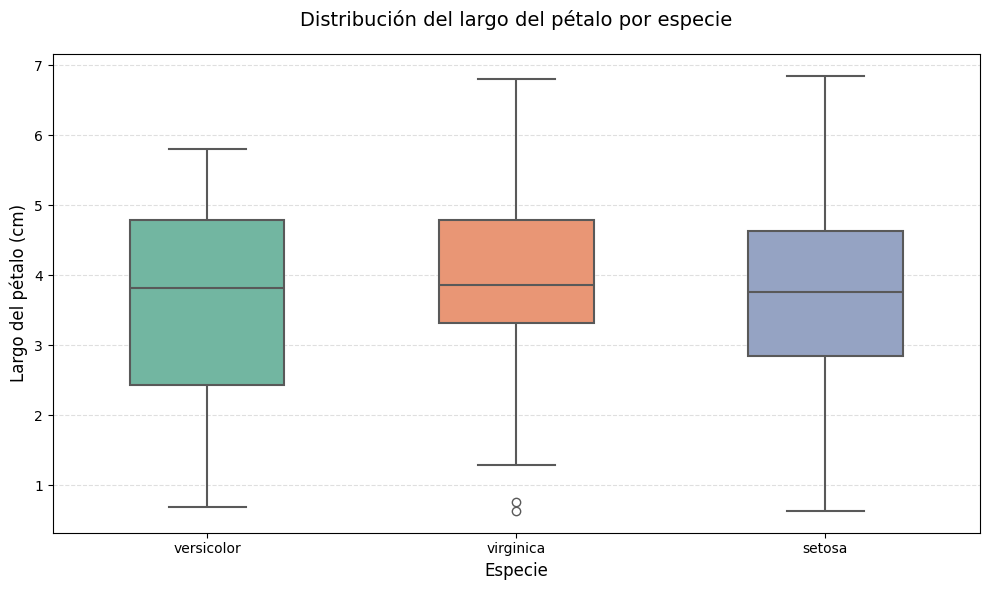

In [27]:

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_iris,
    x='species',          
    y='petal_length',     
    hue='species',       
    palette='Set2',      
    width=0.5,           
    linewidth=1.5,       
    legend=False         
)

plt.title('Distribución del largo del pétalo por especie', fontsize=14, pad=20)
plt.xlabel('Especie', fontsize=12)
plt.ylabel('Largo del pétalo (cm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Mostrar el gráfico
plt.tight_layout()
plt.show()